Aplicando Facebook Prophet para fazer previsões dos preços das ações.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from prophet import Prophet

In [20]:
# Carregando a base de dados com as colunas date e embraer apenas
bovespa = pd.read_csv('/content/bovespa_portfolio.csv', usecols = ['Date', 'EMBRAER'])

In [21]:
bovespa

,Date,EMBRAER
0,2015-01-02,24.850000
1,2015-01-05,24.299999
2,2015-01-06,23.860001
3,2015-01-07,23.680000
4,2015-01-08,23.000000
...,...,...
2124,2023-07-19,17.389999
2125,2023-07-20,17.180000
2126,2023-07-21,17.610001
2127,2023-07-24,18.379999


In [22]:
# Renomeando as colunas para ds e y para que o o algoritmo faça a aprendizagem
bovespa = bovespa[['Date', 'EMBRAER']].rename(columns = {'Date': 'ds', 'EMBRAER': 'y'})

In [23]:
# Conferindo a mudança
bovespa

,ds,y
0,2015-01-02,24.850000
1,2015-01-05,24.299999
2,2015-01-06,23.860001
3,2015-01-07,23.680000
4,2015-01-08,23.000000
...,...,...
2124,2023-07-19,17.389999
2125,2023-07-20,17.180000
2126,2023-07-21,17.610001
2127,2023-07-24,18.379999


In [24]:
# Informações
bovespa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      2129 non-null   object 
 1   y       2129 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.4+ KB


In [25]:
# Informações estatísticas
bovespa.describe()

,y
count,2129.000000
mean,17.944509
std,5.100117
min,6.030000
25%,15.200000
50%,18.340000
75%,21.070000
max,30.400000


In [26]:
# Verificando valores nulos
bovespa.isna().any()

ds    False
y     False
dtype: bool

In [27]:
# Inicio da construção do modelo
modelo = Prophet()
modelo.fit(bovespa)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kq6ypqw/altlr0qg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0kq6ypqw/ws042ryl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57178', 'data', 'file=/tmp/tmp0kq6ypqw/altlr0qg.json', 'init=/tmp/tmp0kq6ypqw/ws042ryl.json', 'output', 'file=/tmp/tmp0kq6ypqw/prophet_modelb35yrlgq/prophet_model-20230726170444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:04:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [28]:
# Nova variavel com novo dataframe com as previsões futuras/ 90 datas para frente
fut = modelo.make_future_dataframe(periods = 90)
previsoes = modelo.predict(fut)

In [29]:
# Observando os valores
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,22.977414,21.509625,27.298546,22.977414,22.977414,1.359413,1.359413,1.359413,-0.315386,-0.315386,-0.315386,1.674799,1.674799,1.674799,0.0,0.0,0.0,24.336827
1,2015-01-05,23.017324,21.425790,27.195596,23.017324,23.017324,1.442560,1.442560,1.442560,-0.304952,-0.304952,-0.304952,1.747511,1.747511,1.747511,0.0,0.0,0.0,24.459884
2,2015-01-06,23.030628,21.688567,27.267354,23.030628,23.030628,1.471486,1.471486,1.471486,-0.282398,-0.282398,-0.282398,1.753885,1.753885,1.753885,0.0,0.0,0.0,24.502114
3,2015-01-07,23.043931,21.614640,27.261464,23.043931,23.043931,1.499303,1.499303,1.499303,-0.251802,-0.251802,-0.251802,1.751105,1.751105,1.751105,0.0,0.0,0.0,24.543233
4,2015-01-08,23.057234,21.695495,27.545416,23.057234,23.057234,1.469229,1.469229,1.469229,-0.270053,-0.270053,-0.270053,1.739282,1.739282,1.739282,0.0,0.0,0.0,24.526463


In [30]:
# Observando o tamanho dos registros da base original e da base de previsões
len(bovespa), len(previsoes)

(2129, 2219)

In [31]:
# Confirmando o numero de periodos
len(previsoes) - len(bovespa)

90

In [32]:
# Observando o preço das revisões
previsoes.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2214,2023-10-19,14.774297,11.016627,16.861999,14.350387,15.265786,-0.835623,-0.835623,-0.835623,-0.270053,-0.270053,-0.270053,-0.565571,-0.565571,-0.565571,0.0,0.0,0.0,13.938673
2215,2023-10-20,14.768583,11.013859,16.634285,14.338627,15.268394,-0.857210,-0.857210,-0.857210,-0.315386,-0.315386,-0.315386,-0.541825,-0.541825,-0.541825,0.0,0.0,0.0,13.911372
2216,2023-10-21,14.762869,11.973906,18.082979,14.328421,15.271168,0.195647,0.195647,0.195647,0.712294,0.712294,0.712294,-0.516647,-0.516647,-0.516647,0.0,0.0,0.0,14.958515
2217,2023-10-22,14.757154,11.941694,17.798602,14.322342,15.274103,0.222036,0.222036,0.222036,0.712296,0.712296,0.712296,-0.490261,-0.490261,-0.490261,0.0,0.0,0.0,14.979190
2218,2023-10-23,14.751440,11.073626,17.089527,14.309852,15.283565,-0.767840,-0.767840,-0.767840,-0.304952,-0.304952,-0.304952,-0.462889,-0.462889,-0.462889,0.0,0.0,0.0,13.983600


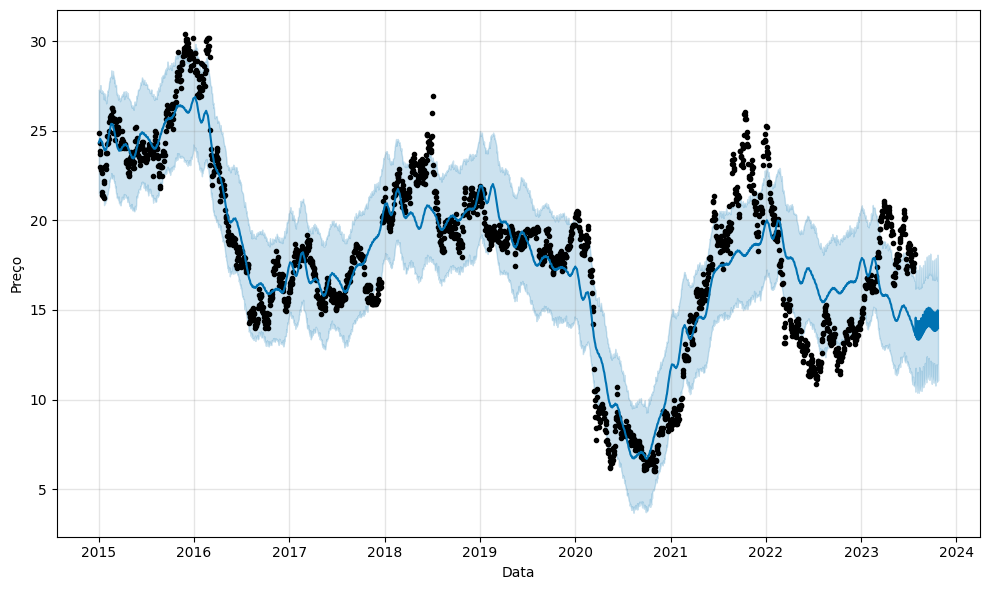

In [34]:
# Grafico das previsões
modelo.plot(previsoes, xlabel = 'Data', ylabel = 'Preço');

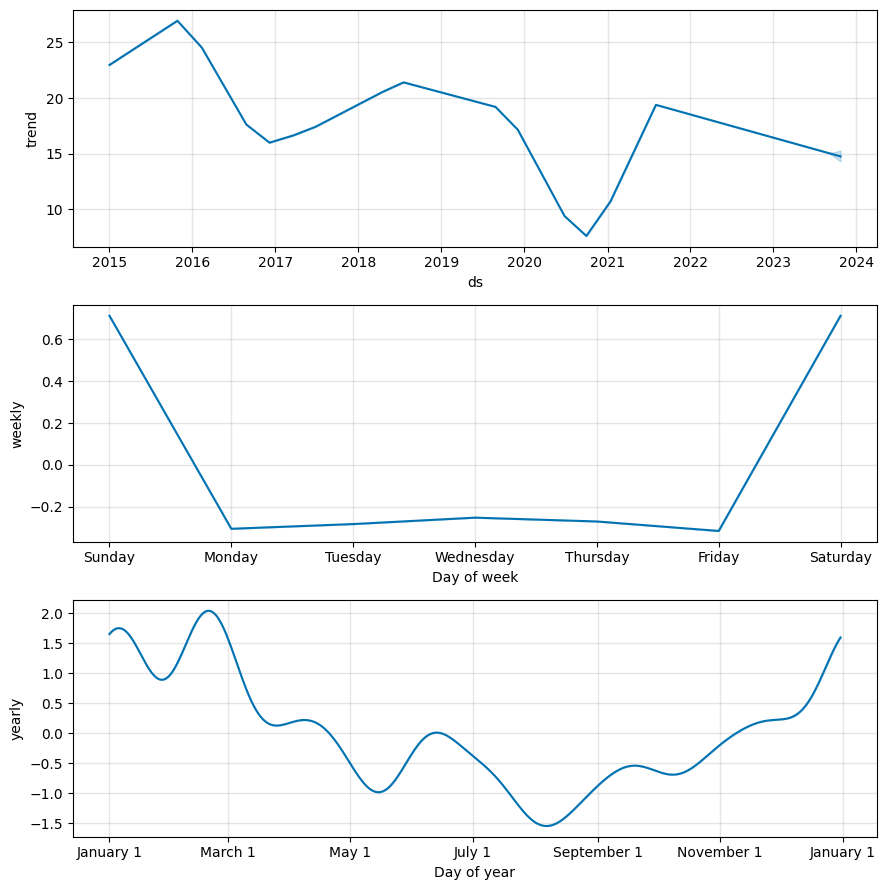

In [35]:
# Grafio com os componentes da série temporal, tendencia, semanal e anual
modelo.plot_components(previsoes);

In [36]:
# Gerando os graficos dinamicos
from prophet.plot import plot_plotly, plot_components_plotly

In [37]:
plot_plotly(modelo, previsoes)

In [38]:
# Grafico dinamico para os componentes
plot_components_plotly(modelo, previsoes)